| Question *Q14*: Using the above code with the parameters Vi and c chosen for nitrogen, edit the value of pressure p over the range 0.5 to 1.5 torr in steps of 0.1 torr. Run the code for each cse to obtain the refined estimate of electron temperature. Then tabulate the results and plot the electron temperature versus pressure. You can do this manually one edit at a time or you can edit the entire code to loop through the values and make a plot. If doing the latter, copy the code into a new cell and edit the copied version.|
|---|



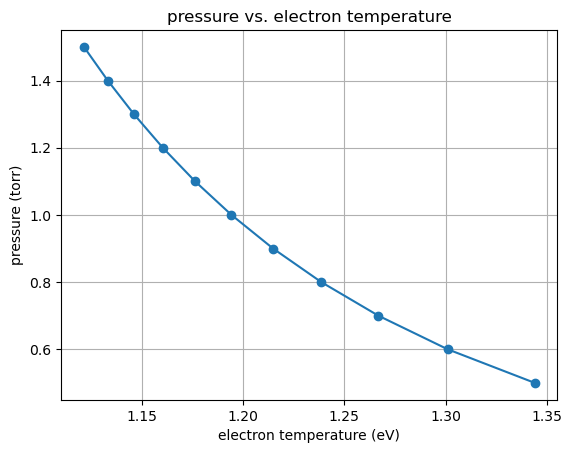

In [15]:
# our edit of the code 

import math
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt

R = 2.54 # radius of tube in cm
Vi = 15.5 # inoization potential in volts
c = 0.04 # von Engel-Steenbeck constant (volts)^-0.25*(cm/s)^-0.5*(torr-cm)^-1

def etempfunc(etempRatio, cpRterm):
    fvalue = etempRatio - 0.5*math.log(etempRatio) - cpRterm 
    return fvalue

p_vals = np.arange(0.5, 1.6, 0.1) # pressure in torr, 0.5 torr - 1.5 torr with 0.1 torr steps
etemps = []

for p in p_vals: # runs through different pressure values
    cpRterm = 16.27 + 2*math.log(c*p*R)
    etempRatioGuess = cpRterm
    etempRatio = opt.fsolve(etempfunc, etempRatioGuess, args=(cpRterm,))
    etemp = Vi/etempRatio
    etemps.append(etemp[0])

fig, ax = plt.subplots()
ax.plot(etemps, p_vals, marker='o')
ax.set_xlabel('electron temperature (eV)')
ax.set_ylabel('pressure (torr)')
ax.set_title('pressure vs. electron temperature')
ax.grid(True)
plt.show()